### Week1授業前課題３ 栗まんじゅう問題

【定義】
- 銀河系の形を球体とします。
- 銀河系の半径を 52,850光年とします。
- バイバインを振りかける対象物の形は球体とします。
- 栗まんじゅうの半径を 10cmとします。
- πは 3.14 とします。
- 誤差はないものとします。
> 0.1 ** 3 = 0.0010000000000000002
- 1年を365.2425日とします。
> [グレゴリオ暦](https://ja.wikipedia.org/wiki/%E3%82%B0%E3%83%AC%E3%82%B4%E3%83%AA%E3%82%AA%E6%9A%A6)

バイバインを振りかけた対象物が増殖して18.17時間後にそのスペースを満たします。


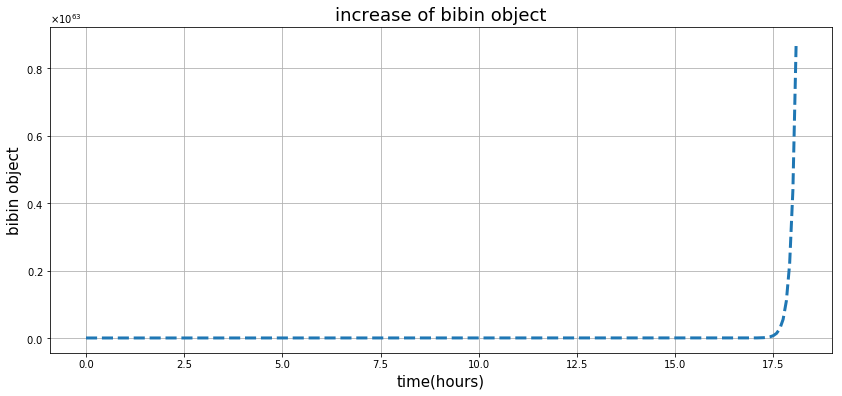

In [128]:
'''
バイバインを振りかける対象物の増殖に与えられたスペースの体積を
どれくらいの時間で満たすのかを求めるコード
'''
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
%matplotlib inline

# バイバインを振りかけた対象物の増殖を計算する関数
def bibin_increase_calculation(f_set_space_vol, f_bibin_vol):
    bibin_increase = []
    bibin_increase.append(f_bibin_vol)
    temp_bibin_increase = 0
    n = 1
    # バイバインを振りかけた対象物の増殖においてスペースの体積を超えない限り処理を繰り返す
    while True:
        if  bibin_increase[-1] > f_set_space_vol:
            break
        temp_bibin_increase = bibin_increase[n-1] * 2
        bibin_increase.append(temp_bibin_increase)
        n += 1

    return bibin_increase

# 球体の体積を計算する関数
def sphere_volume(sphere_radius):
    pi = 3.13
    
    return (4/3) * pi * sphere_radius ** 3

# 銀河系の大きさの半径をmに変換する関数
def galaxy_radius_m():
    galaxy_radius = 52850 # 光年
    speed_light = 299792458 # 光速
    year = 365.2425 # 1年
    hour = 24 # 1日２４時間
    second = 3600 # 1時間3600秒
    
    return (52850 * year * hour * second * speed_light)

# x軸に時間を表示するためのリストを作成する
def xtickst_list(f_bibin_increase_num):
    xtickst_list_time = []
    sum = 0
    
    for i in range(0, f_bibin_increase_num * 5, 5):
        sum = i /60
        xtickst_list_time.append(sum)
    
    return xtickst_list_time

bibin_object_radius = 0.1 # バイバインを振りかける対象物の半径を指定(単位：メートル)
bibin_vol = sphere_volume(bibin_object_radius) #  バイバインを振りかける対象物の体積を計算
set_space_radius = galaxy_radius_m() # 銀河系の半径を光年からmに変換
set_space_vol = sphere_volume(set_space_radius) # バイバインを振りかける対象物をセットするスペース
bibin_increase_list = bibin_increase_calculation(set_space_vol, bibin_vol)
bibin_increase_num = len(bibin_increase_list)
print("バイバインを振りかけた対象物が増殖して{0:.2f}時間後にそのスペースを満たします。".format((bibin_increase_num * 5) / 60))

# バイバインされた対象物が増殖するグラグ
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(xtickst_list(bibin_increase_num), bibin_increase_list, linestyle='dashed', linewidth=3)
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # 指数表記
ax.yaxis.offsetText.set_fontsize(10) # 指数表記の文字サイズを指定
plt.title("increase of bibin object", fontsize=18)
plt.xlabel("time(hours)", fontsize=15)
plt.ylabel("bibin object", fontsize=15)
plt.grid(True)
plt.show()